# Pokémon EDA

## Información general

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings
import holoviews as hv
from holoviews import opts

warnings.filterwarnings("ignore")

In [54]:
file_path = '../data/raw/pokemon_full_stats.csv'
df = pd.read_csv(file_path)

df.head()

,id,name,type1,type2,hp,attack,defense,speed,height,weight,abilities,generation,catch_rate,category
0,1,bulbasaur,grass,poison,45,49,49,45,7,69,"['overgrow', 'chlorophyll']",generation-i,45,Seed Pokémon
1,2,ivysaur,grass,poison,60,62,63,60,10,130,"['overgrow', 'chlorophyll']",generation-i,45,Seed Pokémon
2,3,venusaur,grass,poison,80,82,83,80,20,1000,"['overgrow', 'chlorophyll']",generation-i,45,Seed Pokémon
3,4,charmander,fire,NaN,39,52,43,65,6,85,"['blaze', 'solar-power']",generation-i,45,Lizard Pokémon
4,5,charmeleon,fire,NaN,58,64,58,80,11,190,"['blaze', 'solar-power']",generation-i,45,Flame Pokémon


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1025 non-null   int64 
 1   name        1025 non-null   object
 2   type1       1025 non-null   object
 3   type2       526 non-null    object
 4   hp          1025 non-null   int64 
 5   attack      1025 non-null   int64 
 6   defense     1025 non-null   int64 
 7   speed       1025 non-null   int64 
 8   height      1025 non-null   int64 
 9   weight      1025 non-null   int64 
 10  abilities   1025 non-null   object
 11  generation  1025 non-null   object
 12  catch_rate  1025 non-null   int64 
 13  category    1025 non-null   object
dtypes: int64(8), object(6)
memory usage: 112.2+ KB


In [56]:
df.describe()

,id,hp,attack,defense,speed,height,weight,catch_rate
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,513.000000,70.184390,77.521951,72.507317,67.186341,12.116098,669.865366,95.454634
std,296.036315,26.631054,29.782541,29.286972,28.717227,12.481673,1212.731138,75.991841
min,1.000000,1.000000,5.000000,5.000000,5.000000,1.000000,1.000000,3.000000
25%,257.000000,50.000000,55.000000,50.000000,45.000000,5.000000,85.000000,45.000000
50%,513.000000,68.000000,75.000000,70.000000,65.000000,10.000000,280.000000,60.000000
75%,769.000000,85.000000,100.000000,90.000000,88.000000,15.000000,700.000000,140.000000
max,1025.000000,255.000000,181.000000,230.000000,200.000000,200.000000,9999.000000,255.000000


In [57]:
df.describe(include='object')

,name,type1,type2,abilities,generation,category
count,1025,1025,526,1025,1025,1025
unique,1025,18,18,622,9,715
top,bulbasaur,water,flying,['levitate'],generation-v,Paradox Pokémon
freq,1,134,100,27,156,22


In [58]:
gens = {
    'generation-i': 'Kanto', 
    'generation-ii': 'Johto', 
    'generation-iii': 'Hoenn', 
    'generation-iv': 'Sinnoh', 
    'generation-v': 'Teselia', 
    'generation-vi': 'Kalos', 
    'generation-vii': 'Alola',
    'generation-viii': 'Galar', 
    'generation-ix': 'Paldea'
}

df['generation'] = df.generation.apply(lambda x: gens[x])

In [59]:
df

,id,name,type1,type2,hp,attack,defense,speed,height,weight,abilities,generation,catch_rate,category
0,1,bulbasaur,grass,poison,45,49,49,45,7,69,"['overgrow', 'chlorophyll']",Kanto,45,Seed Pokémon
1,2,ivysaur,grass,poison,60,62,63,60,10,130,"['overgrow', 'chlorophyll']",Kanto,45,Seed Pokémon
2,3,venusaur,grass,poison,80,82,83,80,20,1000,"['overgrow', 'chlorophyll']",Kanto,45,Seed Pokémon
3,4,charmander,fire,NaN,39,52,43,65,6,85,"['blaze', 'solar-power']",Kanto,45,Lizard Pokémon
4,5,charmeleon,fire,NaN,58,64,58,80,11,190,"['blaze', 'solar-power']",Kanto,45,Flame Pokémon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,electric,dragon,125,73,91,75,52,4800,['protosynthesis'],Paldea,10,Paradox Pokémon
1021,1022,iron-boulder,rock,psychic,90,120,80,124,15,1625,['quark-drive'],Paldea,10,Paradox Pokémon
1022,1023,iron-crown,steel,psychic,90,72,100,98,16,1560,['quark-drive'],Paldea,10,Paradox Pokémon
1023,1024,terapagos,normal,NaN,90,65,85,60,2,65,['tera-shift'],Paldea,255,Tera Pokémon


## Análisis univariado 📊

### Distribución de Estadísticas Base (HP, Ataque, etc.)

In [60]:
# --- Configuración de Estilo para los Gráficos ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

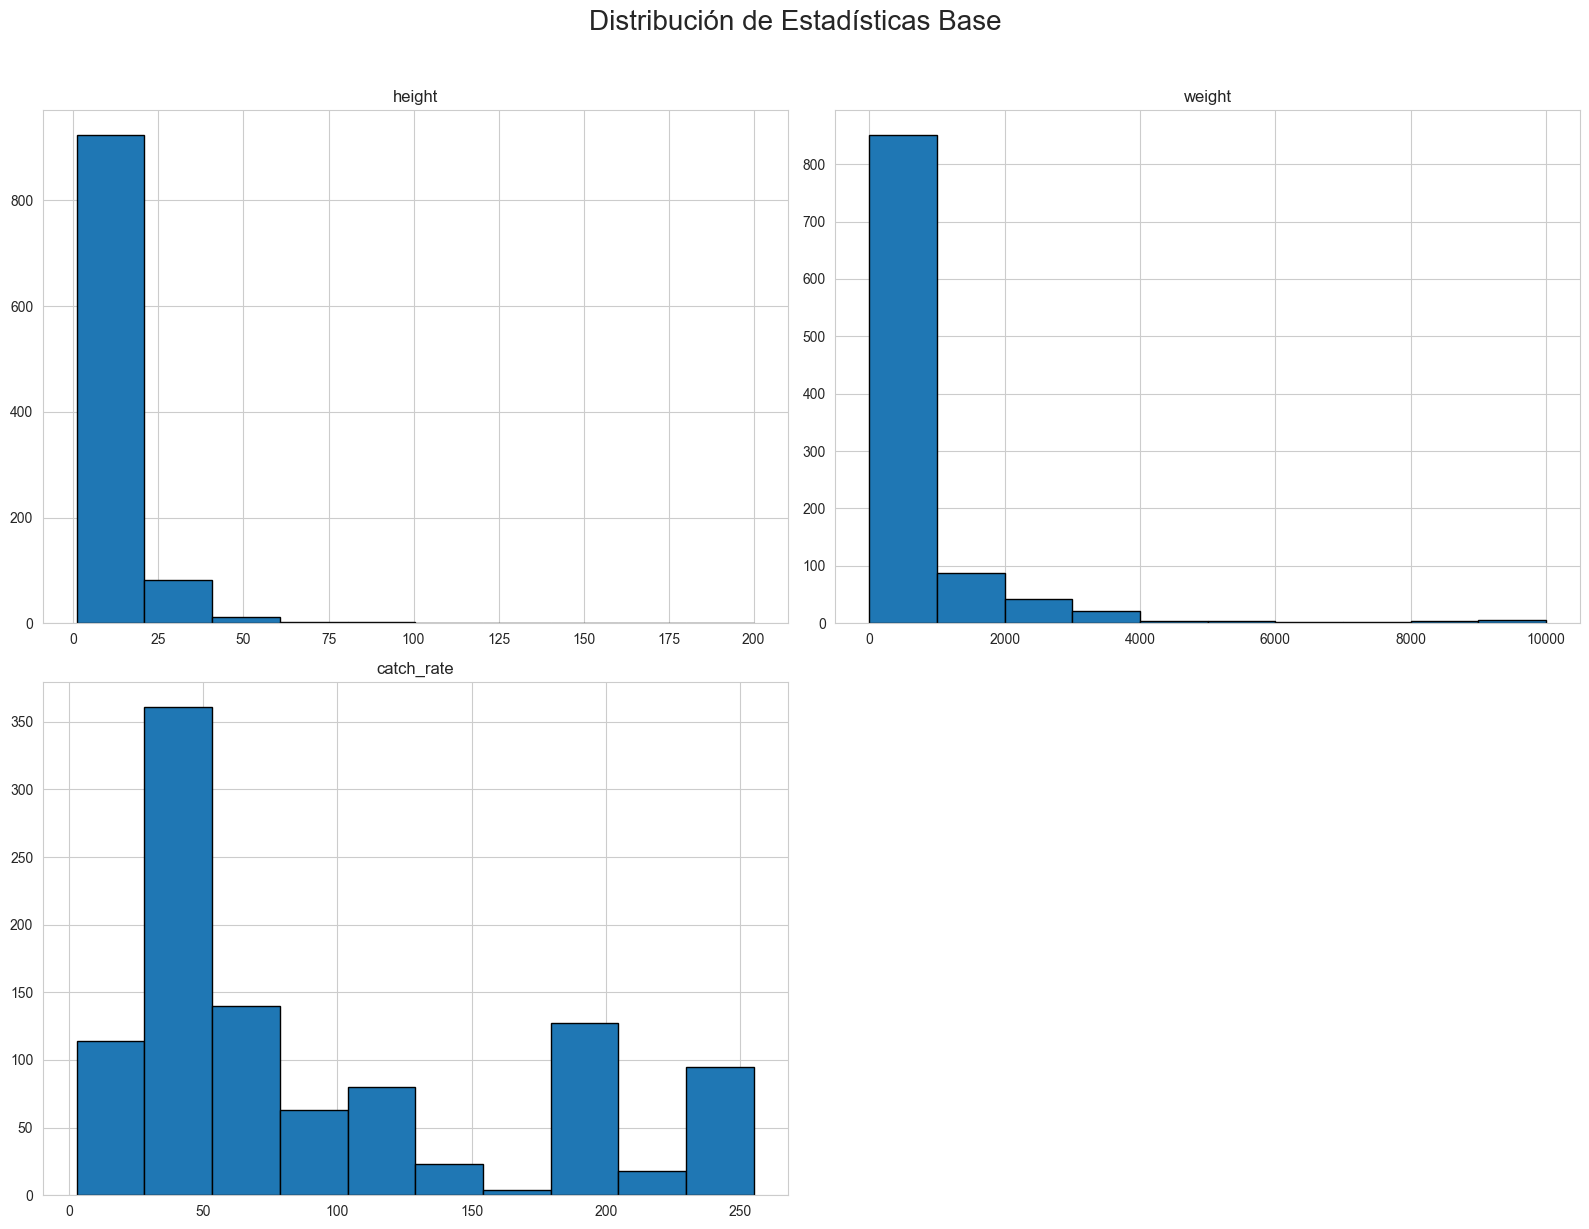

In [61]:
# --- Histogramas para Estadísticas Base ---
stats_cols = ['height', 'weight', 'catch_rate']
df[stats_cols].hist(bins=10, edgecolor='black')

plt.suptitle('Distribución de Estadísticas Base', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

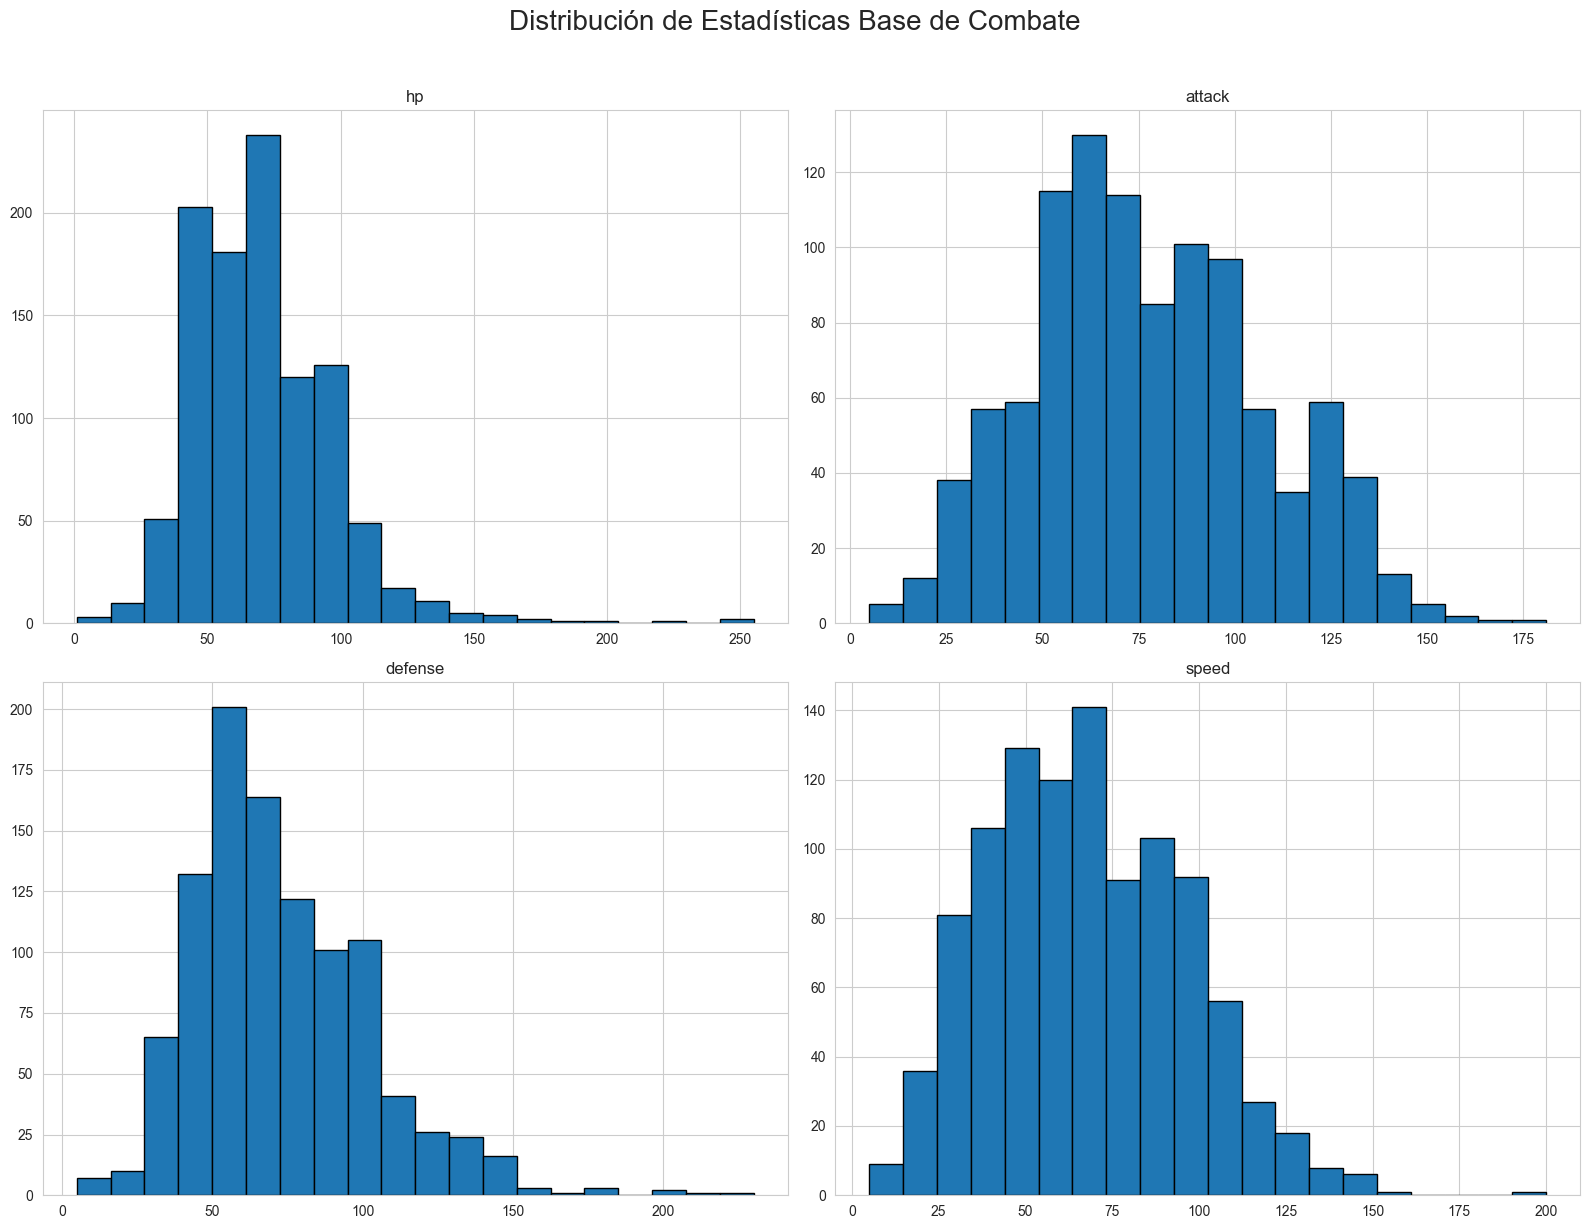

In [62]:
# --- Histogramas para Estadísticas Base de Combate---
stats_cols = ['hp', 'attack', 'defense', 'speed']
df[stats_cols].hist(bins=20, edgecolor='black')

plt.suptitle('Distribución de Estadísticas Base de Combate', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

### Conteo de Pokémon por Generación

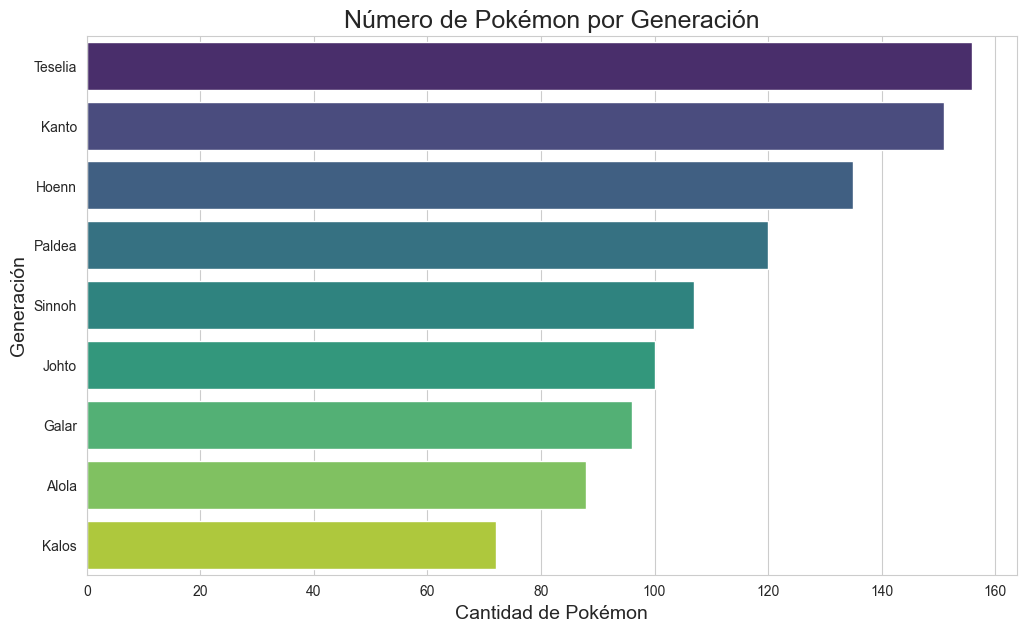

In [63]:
# --- Gráfico de Barras para Generaciones ---
plt.figure(figsize=(12, 7))
sns.countplot(y=df['generation'], order = df['generation'].value_counts().index, palette='viridis')

plt.title('Número de Pokémon por Generación', fontsize=18)
plt.xlabel('Cantidad de Pokémon', fontsize=14)
plt.ylabel('Generación', fontsize=14)
plt.show()

### Frecuencia de Tipos Primarios

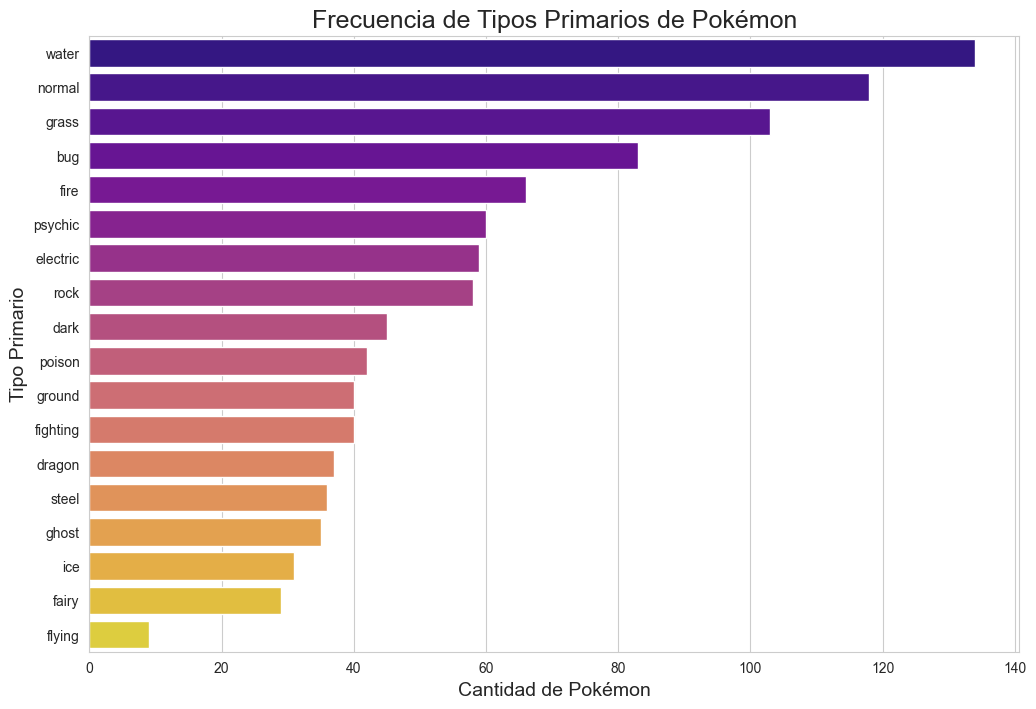

In [64]:
# --- Gráfico de Barras para Tipos Primarios ---
plt.figure(figsize=(12, 8))
sns.countplot(y=df['type1'], order = df['type1'].value_counts().index, palette='plasma')

plt.title('Frecuencia de Tipos Primarios de Pokémon', fontsize=18)
plt.xlabel('Cantidad de Pokémon', fontsize=14)
plt.ylabel('Tipo Primario', fontsize=14)
plt.show()

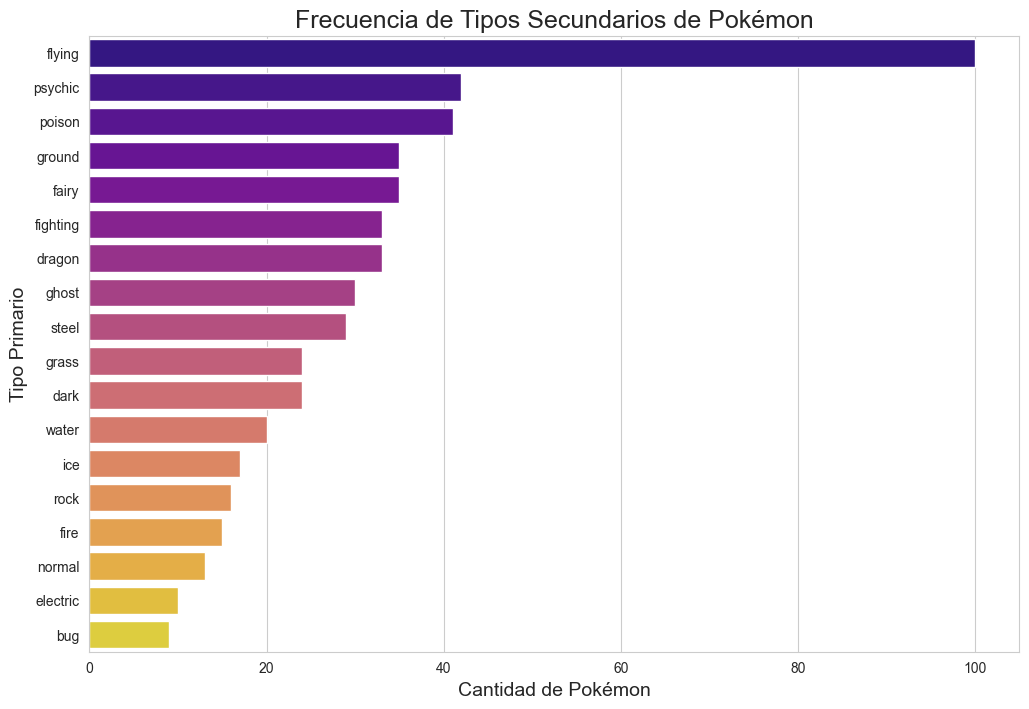

In [65]:
# --- Gráfico de Barras para Tipos Primarios ---
plt.figure(figsize=(12, 8))
sns.countplot(y=df['type2'], order = df['type2'].value_counts().index, palette='plasma')

plt.title('Frecuencia de Tipos Secundarios de Pokémon', fontsize=18)
plt.xlabel('Cantidad de Pokémon', fontsize=14)
plt.ylabel('Tipo Primario', fontsize=14)
plt.show()

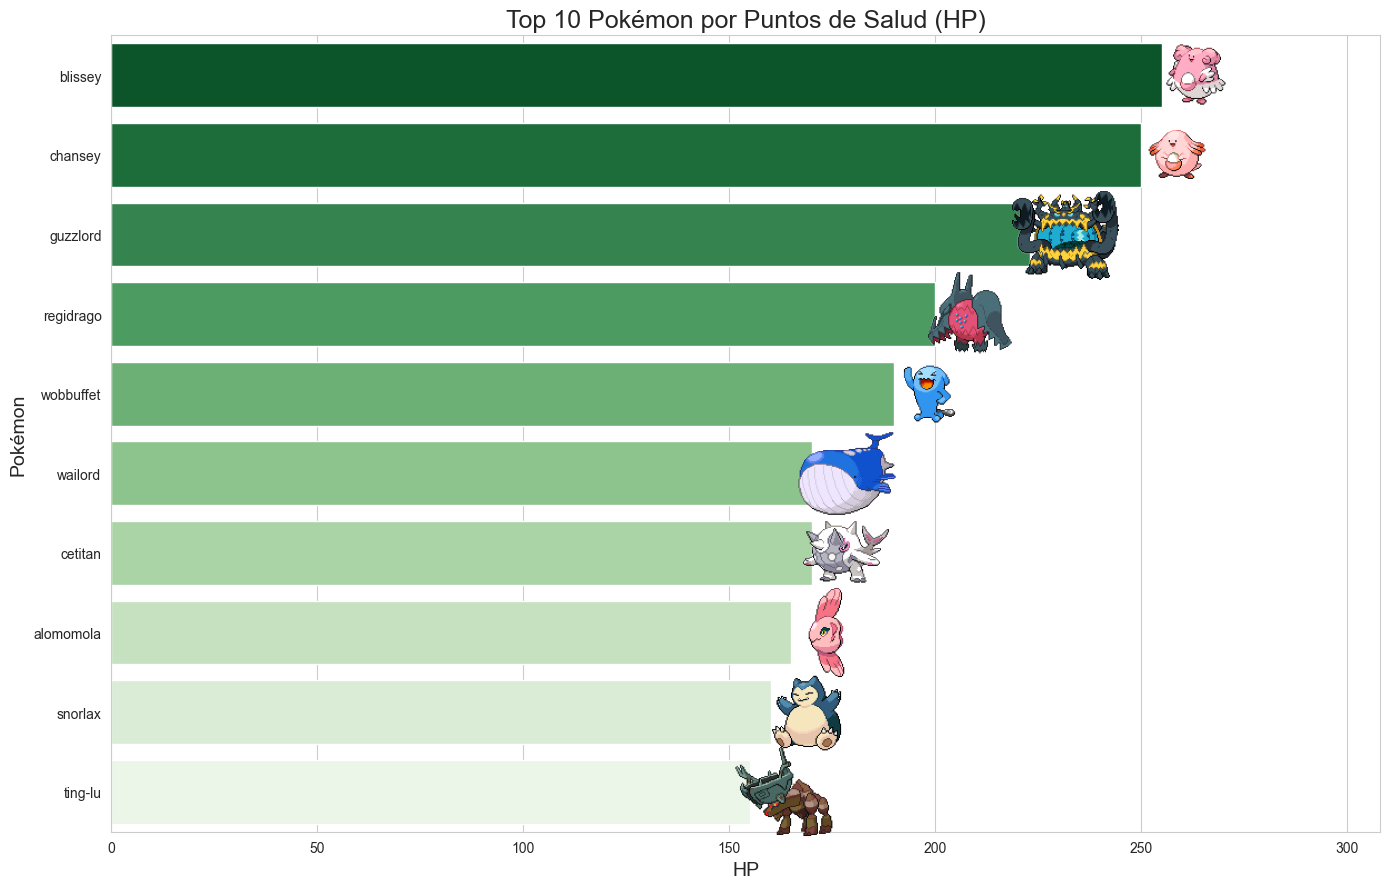

In [66]:
# --- Top 10 Pokémon más Saludables (HP) ---
top_10_hp = df.sort_values('hp', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 9))
sns.barplot(x='hp', y='name', data=top_10_hp, palette='Greens_r')

# --- 3. Añadir los Sprites a cada Barra ---
for i, (index, row) in enumerate(top_10_hp.iterrows()):
    try:
        sprite_path = f"../images/sprites/{row['name'].lower()}.png"
        
        # Leemos la imagen
        img = mpimg.imread(sprite_path)

        # Creamos el objeto de imagen que Matplotlib puede usar
        # El zoom ajusta el tamaño del sprite en el gráfico
        imagebox = OffsetImage(img, zoom=0.8)
        imagebox.image.axes = ax

        # Creamos la caja de anotación para posicionar la imagen
        # Coordenadas: (x, y) donde 'x' es el valor de HP y 'y' es la posición de la barra (0, 1, 2...)
        # El segundo argumento es la posición en píxeles donde se ancla la imagen, (0,0) es el centro.
        ab = AnnotationBbox(imagebox, 
                            (row['hp'], i), 
                            xybox=(25, 0), # Desplaza la imagen 25 píxeles a la derecha del final de la barra
                            frameon=False,
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0)
        
        # Añadimos la imagen al gráfico
        ax.add_artist(ab)
        
    except FileNotFoundError:
        # Si un sprite no se encuentra, simplemente imprimimos un aviso y continuamos
        print(f"Advertencia: No se encontró el sprite para {row['name']}")


plt.title('Top 10 Pokémon por Puntos de Salud (HP)', fontsize=18)
plt.xlabel('HP', fontsize=14)
plt.ylabel('Pokémon', fontsize=14)

# Ajustar los límites del eje X para dar espacio a los sprites
ax.set_xlim(right=ax.get_xlim()[1] * 1.15) 

plt.tight_layout()
plt.show()

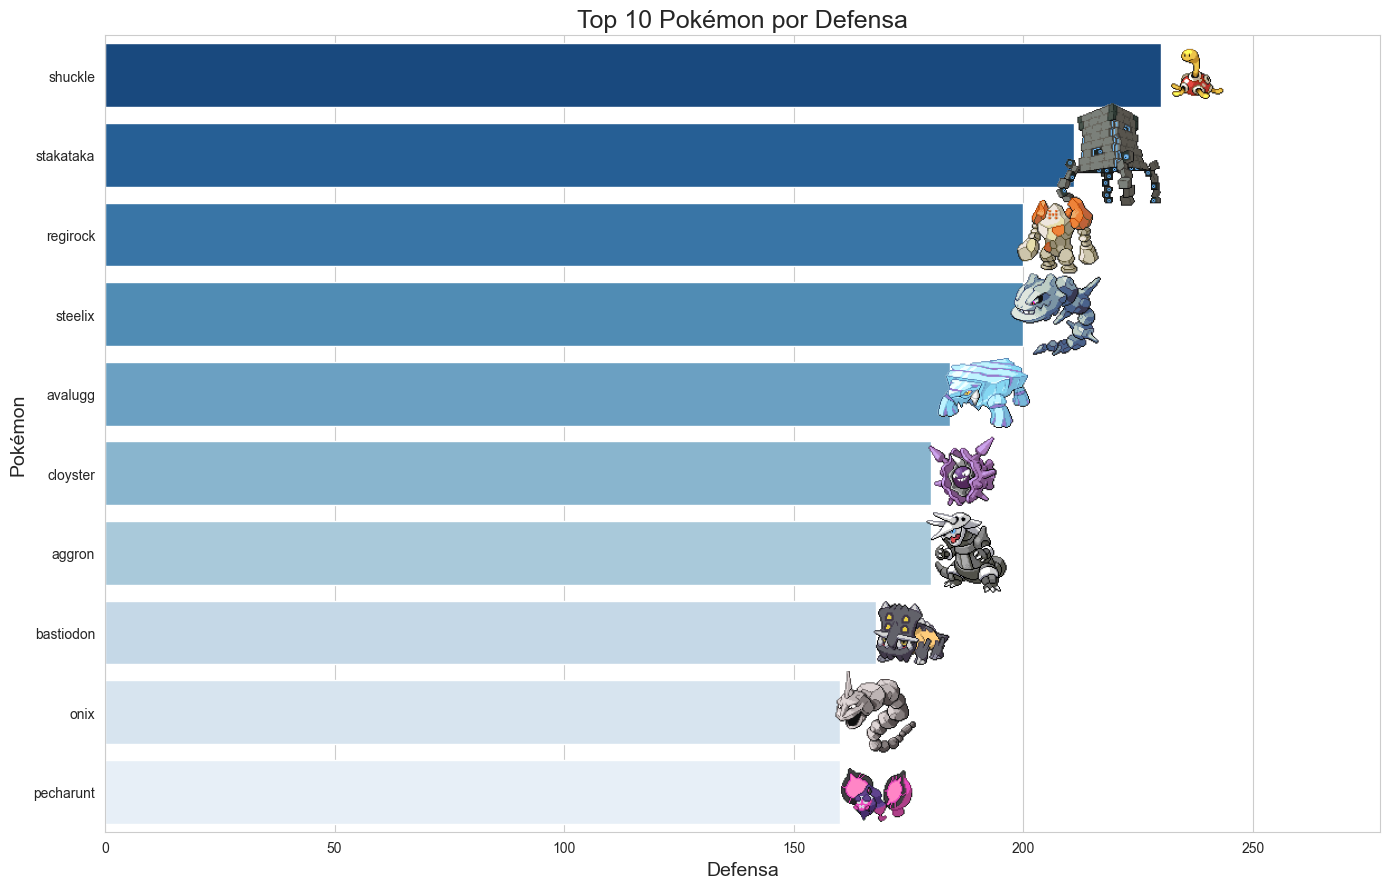

In [67]:
# --- Top 10 Pokémon más Defensivos ---
top_10_defense = df.sort_values('defense', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 9))
sns.barplot(x='defense', y='name', data=top_10_defense, palette='Blues_r')

# --- 3. Añadir los Sprites a cada Barra ---
for i, (index, row) in enumerate(top_10_defense.iterrows()):
    try:
        sprite_path = f"../images/sprites/{row['name'].lower()}.png"
        
        # Leemos la imagen
        img = mpimg.imread(sprite_path)

        # Creamos el objeto de imagen que Matplotlib puede usar
        # El zoom ajusta el tamaño del sprite en el gráfico
        imagebox = OffsetImage(img, zoom=0.8)
        imagebox.image.axes = ax

        # Creamos la caja de anotación para posicionar la imagen
        # Coordenadas: (x, y) donde 'x' es el valor de HP y 'y' es la posición de la barra (0, 1, 2...)
        # El segundo argumento es la posición en píxeles donde se ancla la imagen, (0,0) es el centro.
        ab = AnnotationBbox(imagebox, 
                            (row['defense'], i), 
                            xybox=(25, 0), # Desplaza la imagen 25 píxeles a la derecha del final de la barra
                            frameon=False,
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0)
        
        # Añadimos la imagen al gráfico
        ax.add_artist(ab)
        
    except FileNotFoundError:
        # Si un sprite no se encuentra, simplemente imprimimos un aviso y continuamos
        print(f"Advertencia: No se encontró el sprite para {row['name']}")


plt.title('Top 10 Pokémon por Defensa', fontsize=18)
plt.xlabel('Defensa', fontsize=14)
plt.ylabel('Pokémon', fontsize=14)

# Ajustar los límites del eje X para dar espacio a los sprites
ax.set_xlim(right=ax.get_xlim()[1] * 1.15) 

plt.tight_layout()
plt.show()

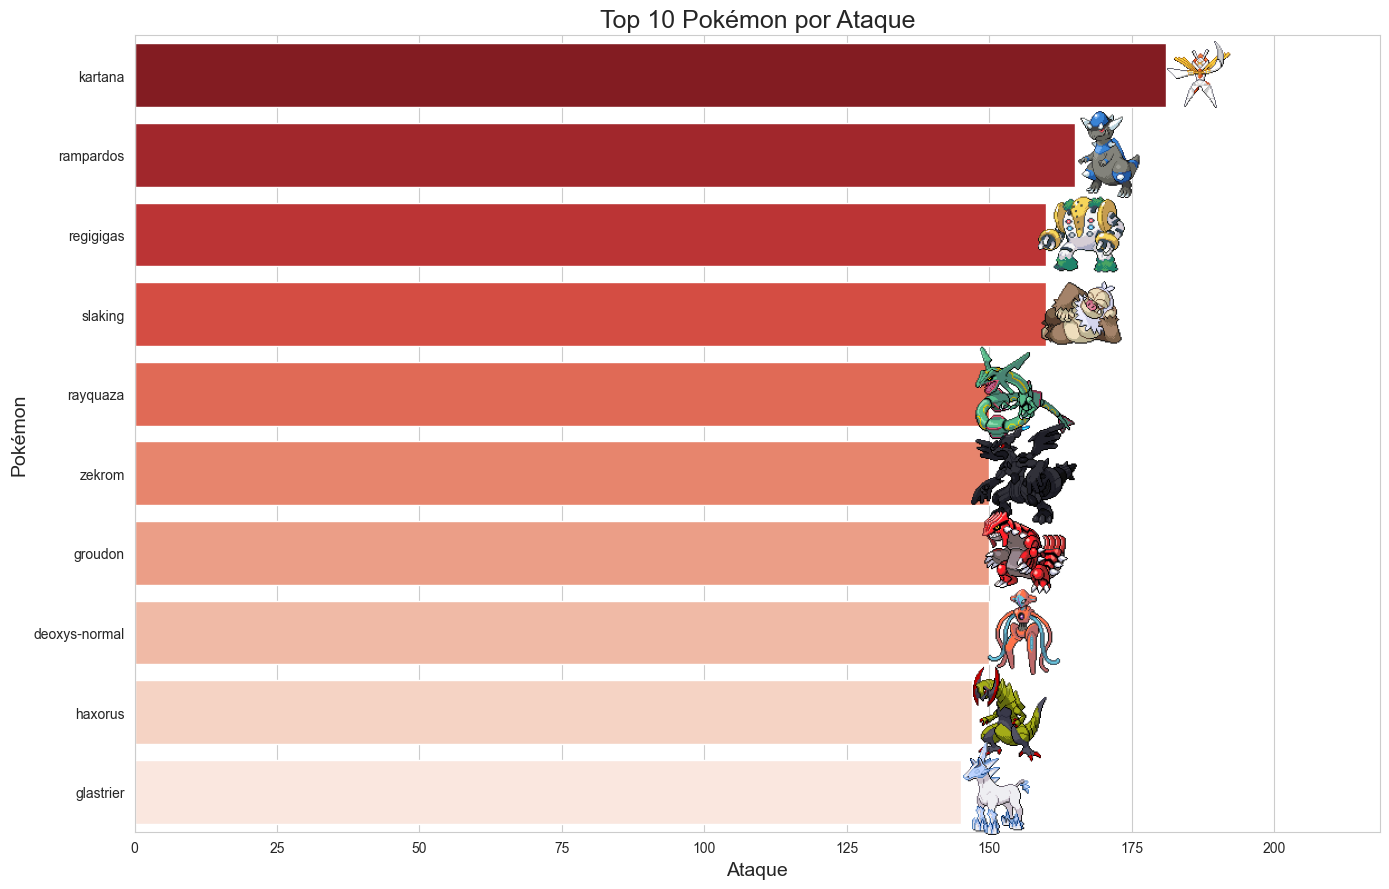

In [68]:
# --- Top 10 Pokémon más Fuertes (Ataque) ---
top_10_attack = df.sort_values('attack', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(14, 9))
sns.barplot(x='attack', y='name', data=top_10_attack, palette='Reds_r')

# --- 3. Añadir los Sprites a cada Barra ---
for i, (index, row) in enumerate(top_10_attack.iterrows()):
    try:
        sprite_path = f"../images/sprites/{row['name'].lower()}.png"
        
        # Leemos la imagen
        img = mpimg.imread(sprite_path)

        # Creamos el objeto de imagen que Matplotlib puede usar
        # El zoom ajusta el tamaño del sprite en el gráfico
        imagebox = OffsetImage(img, zoom=0.8)
        imagebox.image.axes = ax

        # Creamos la caja de anotación para posicionar la imagen
        # Coordenadas: (x, y) donde 'x' es el valor de HP y 'y' es la posición de la barra (0, 1, 2...)
        # El segundo argumento es la posición en píxeles donde se ancla la imagen, (0,0) es el centro.
        ab = AnnotationBbox(imagebox, 
                            (row['attack'], i), 
                            xybox=(25, 0), # Desplaza la imagen 25 píxeles a la derecha del final de la barra
                            frameon=False,
                            xycoords='data',
                            boxcoords="offset points",
                            pad=0)
        
        # Añadimos la imagen al gráfico
        ax.add_artist(ab)
        
    except FileNotFoundError:
        # Si un sprite no se encuentra, simplemente imprimimos un aviso y continuamos
        print(f"Advertencia: No se encontró el sprite para {row['name']}")


plt.title('Top 10 Pokémon por Ataque', fontsize=18)
plt.xlabel('Ataque', fontsize=14)
plt.ylabel('Pokémon', fontsize=14)

# Ajustar los límites del eje X para dar espacio a los sprites
ax.set_xlim(right=ax.get_xlim()[1] * 1.15) 

plt.tight_layout()
plt.show()

## 2. Análisis de Correlaciones

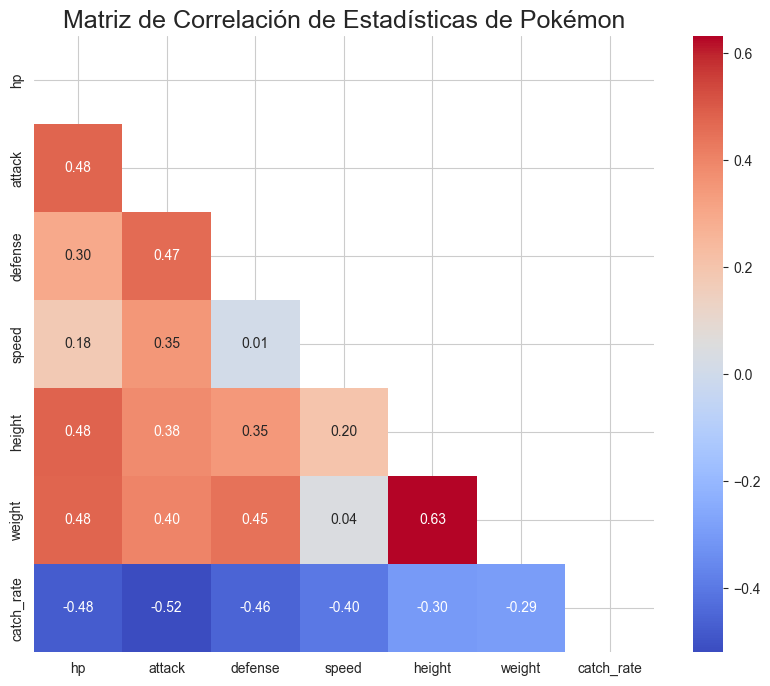

In [69]:
# --- 1. Seleccionar solo las Columnas Numéricas ---
# Seleccionamos las variables que tienen sentido para un análisis de correlación.
numeric_cols = ['hp', 'attack', 'defense', 'speed', 'height', 'weight', 'catch_rate']
df_numeric = df[numeric_cols]

# --- 2. Calcular la Matriz de Correlación ---
# El método .corr() de pandas calcula la correlación de Pearson por defecto.
corr_matrix = df_numeric.corr()

# --- 3. Crear el Heatmap ---
plt.figure(figsize=(10, 8))

# Usamos una máscara para ocultar la mitad superior del heatmap, ya que es redundante (espejada).
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            annot=True,     # Muestra los valores numéricos en cada celda
            cmap='coolwarm',# Paleta de colores (frío para negativo, cálido para positivo)
            mask=mask,      # Aplica la máscara
            fmt=".2f")      # Formatea los números a 2 decimales

plt.title('Matriz de Correlación de Estadísticas de Pokémon', fontsize=18)
plt.show()

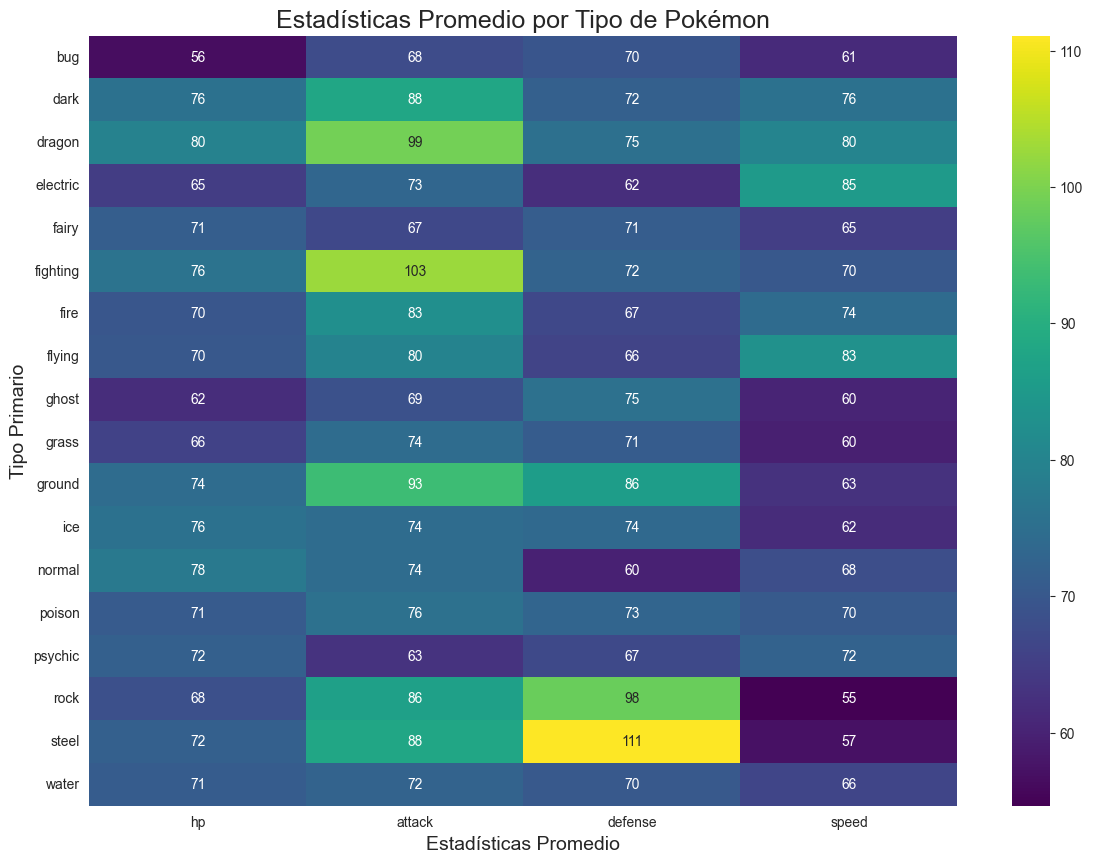

In [70]:
# --- 1. Definir las Columnas de Estadísticas de Interés ---
stats_cols = ['hp', 'attack', 'defense', 'speed']

# --- 2. Agrupar por Tipo y Calcular la Media ---
# Usamos groupby() para agrupar todas las filas por su 'type1'.
# Luego, seleccionamos las columnas de estadísticas y calculamos su media para cada grupo.
mean_stats_by_type = df.groupby('type1')[stats_cols].mean()

# --- 3. Crear el Heatmap de Medias ---
plt.figure(figsize=(14, 10))

sns.heatmap(mean_stats_by_type,
            annot=True,       # Muestra los valores numéricos
            cmap='viridis',   # Usamos una paleta de colores secuencial (de bajo a alto)
            fmt=".0f")        # Formateamos los números como enteros para mayor claridad

plt.title('Estadísticas Promedio por Tipo de Pokémon', fontsize=18)
plt.xlabel('Estadísticas Promedio', fontsize=14)
plt.ylabel('Tipo Primario', fontsize=14)
plt.show()

## 3. Análisis por Grupos 👨‍👩‍👧‍👦

### Estadísticas por Tipo Primario

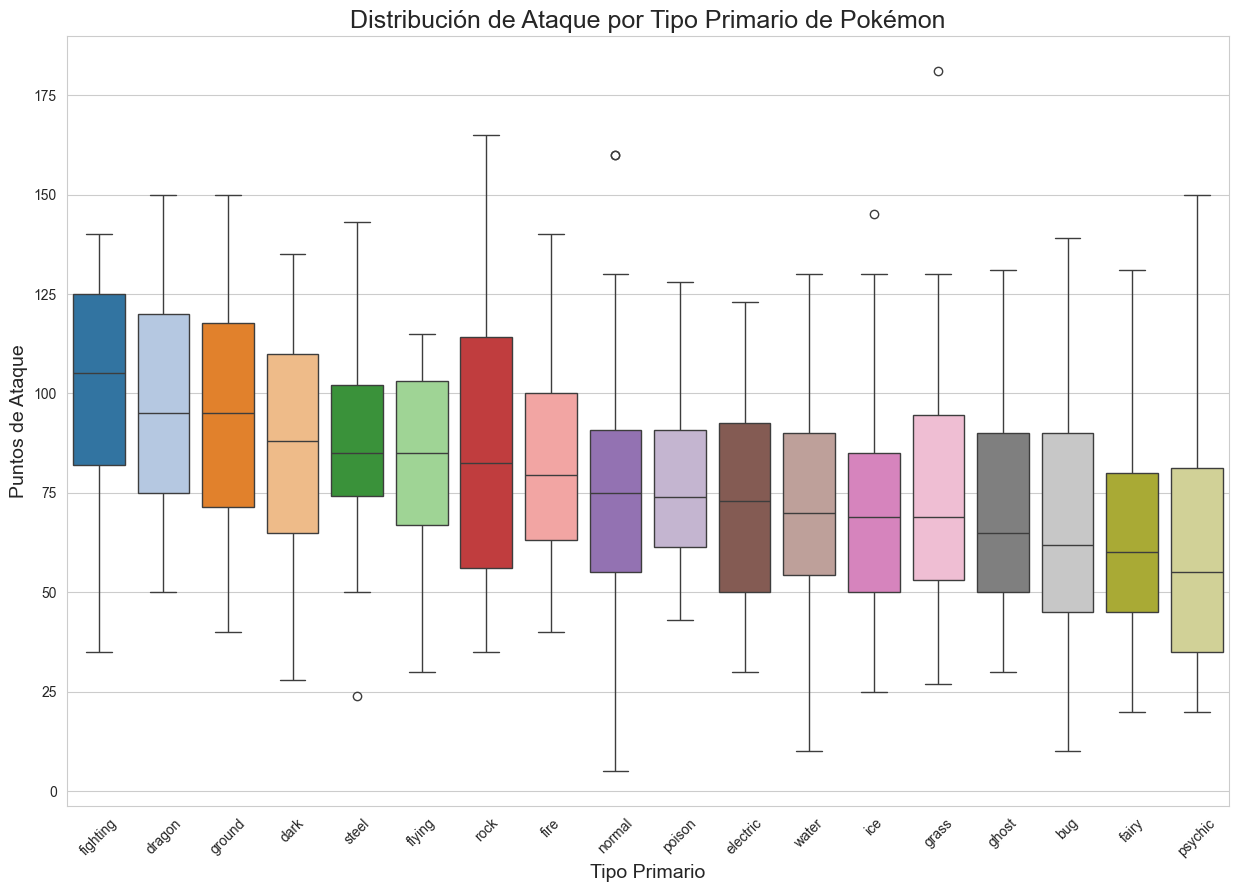

In [71]:
# --- 1. Calcular el Orden de los Tipos por Mediana de Ataque ---
# Ordenar las cajas por la mediana del ataque hace que el gráfico sea mucho más fácil de leer.
type_order = df.groupby('type1')['attack'].median().sort_values(ascending=False).index

# --- 2. Crear el Boxplot ---
plt.figure(figsize=(15, 10))
sns.boxplot(x='type1', y='attack', data=df, order=type_order, palette='tab20')

plt.title('Distribución de Ataque por Tipo Primario de Pokémon', fontsize=18)
plt.xlabel('Tipo Primario', fontsize=14)
plt.ylabel('Puntos de Ataque', fontsize=14)
plt.xticks(rotation=45) # Rotamos las etiquetas para que no se superpongan
plt.show()

### "Power Creep": Estadísticas por Generación

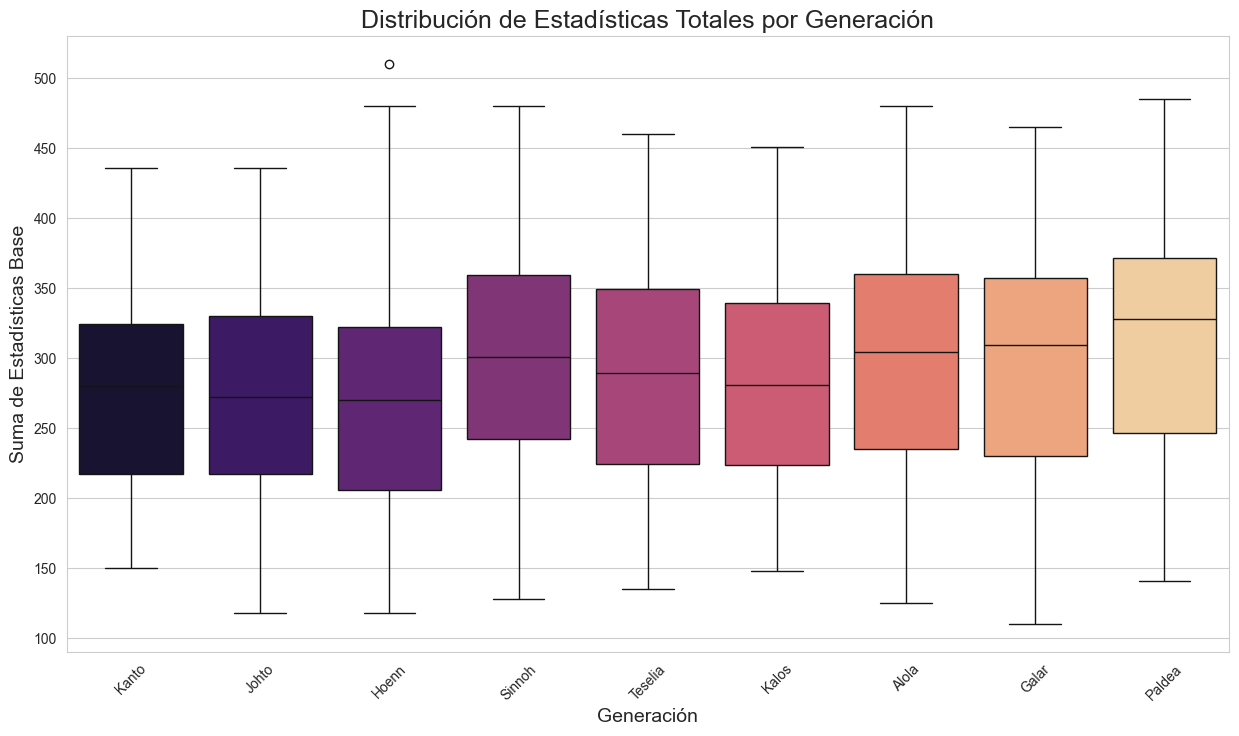

In [74]:
# --- 1. Crear una Columna de "Estadísticas Totales" ---
stats_cols = ['hp', 'attack', 'defense', 'speed'] # Puedes añadir más si quieres
df['total_stats'] = df[stats_cols].sum(axis=1)

# --- 2. Ordenar las Generaciones Cronológicamente ---
gen_order = gens.values()

# --- 3. Crear el Boxplot ---
plt.figure(figsize=(15, 8))
sns.boxplot(x='generation', y='total_stats', data=df, order=gen_order, palette='magma')

plt.title('Distribución de Estadísticas Totales por Generación', fontsize=18)
plt.xlabel('Generación', fontsize=14)
plt.ylabel('Suma de Estadísticas Base', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Legendarios 🆚 Comunes

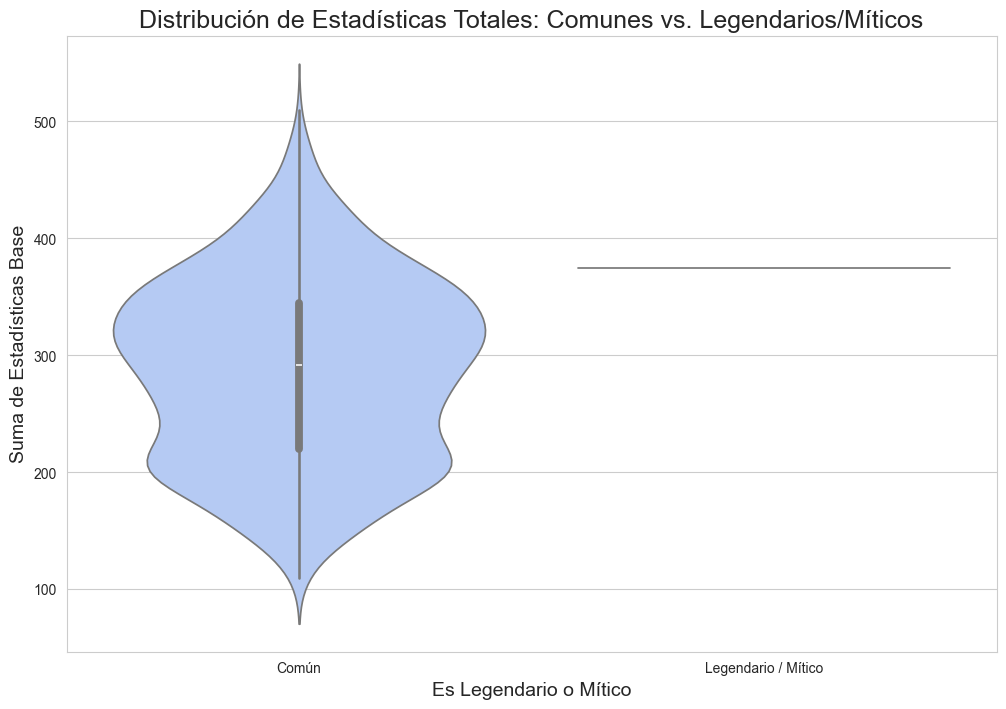

In [88]:
# --- 1. Identificar Pokémon Legendarios y Míticos ---
# Creamos una nueva columna booleana. Asumimos que la categoría contiene estas palabras.
df['is_legendary'] = df['category'].str.contains('Legendary Pokémon', na=False)

# --- 2. Crear el Gráfico de Violín ---
plt.figure(figsize=(12, 8))
sns.violinplot(x='is_legendary', y='total_stats', data=df, palette='coolwarm')

plt.title('Distribución de Estadísticas Totales: Comunes vs. Legendarios/Míticos', fontsize=18)
plt.xlabel('Es Legendario o Mítico', fontsize=14)
plt.ylabel('Suma de Estadísticas Base', fontsize=14)
# Cambiamos las etiquetas del eje X para que sean más claras
plt.xticks(ticks=[False, True], labels=['Común', 'Legendario / Mítico'])
plt.show()

## 4. Análisis de Combinación de Tipos (Diagrama de Cuerdas)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
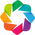

:Chord   [source,target]   (value)

In [102]:
# --- 1. Cargar la Extensión de Bokeh ---
hv.extension('bokeh')

# --- 2. Definir el Mapa de Colores Temático ---
# Diccionario que mapea cada tipo a un color hexadecimal específico.
type_colors = {
    'normal': '#A8A77A', 'fire': '#EE8130', 'water': '#6390F0', 'electric': '#F7D02C',
    'grass': '#7AC74C', 'ice': '#96D9D6', 'fighting': '#C22E28', 'poison': '#A33EA1',
    'ground': '#E2BF65', 'flying': '#A98FF3', 'psychic': '#F95587', 'bug': '#A6B91A',
    'rock': '#B6A136', 'ghost': '#735797', 'dragon': '#6F35FC', 'dark': '#705746',
    'steel': '#B7B7CE', 'fairy': '#D685AD'
}

# --- 3. Preparar los Datos de Enlaces (links) ---
# (Este paso es el mismo que antes)
df_types = df[['type1', 'type2']].dropna()
all_types = sorted(pd.concat([df_types['type1'], df_types['type2']]).unique())
co_occurrence_matrix = pd.DataFrame(0, index=all_types, columns=all_types)

for index, row in df_types.iterrows():
    t1, t2 = row['type1'], row['type2']
    co_occurrence_matrix.loc[t1, t2] += 1
    co_occurrence_matrix.loc[t2, t1] += 1

links = co_occurrence_matrix.stack().reset_index()
links.columns = ['source', 'target', 'value']
links = links[links['value'] > 0]

# --- 4. Crear el DataFrame de Nodos con Colores ---
# HoloViews nos permite definir los nodos explícitamente.
# Creamos un DataFrame con el nombre de cada tipo y le asignamos su color.
nodes = pd.DataFrame({'name': all_types})
nodes['color'] = nodes['name'].map(type_colors)

# --- 5. Crear el Diagrama de Cuerdas (ahora con nodos) ---
# Pasamos tanto los enlaces (links) como los nodos (nodes) a hv.Chord.
chord_diagram = hv.Chord((links, hv.Dataset(nodes, 'name')))

# --- 6. Estilizar y Mostrar el Gráfico ---
chord_diagram.opts(
    opts.Chord(
        labels='name',
        node_color='color',
        tools=[],
        edge_color='source',
        edge_cmap=type_colors,
        edge_alpha=0.75,
        width=600,
        height=600,
        title="Relaciones de Tipos de Pokémon"
    )
)

# Para mostrarlo en el notebook:
chord_diagram

#hv.save(chord_diagram, '../images/chord_plot.png', fmt='png')

## 5. Clustering de Pokémon 🤖

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import mlflow
import joblib
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [118]:
# --- 1. Preparación de Datos ---
# Seleccionamos las estadísticas que definen el rol de combate de un Pokémon.
cluster_cols = ['hp', 'attack', 'defense', 'speed', 'height', 'weight']
df_cluster = df[cluster_cols].copy()

# Escalamos los datos: K-Means se basa en distancias, por lo que es CRUCIAL
# que todas las variables estén en la misma escala.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [119]:
# --- 2. Encontrar el Número Óptimo de Clústeres (K) con el Método del Codo ---
# Calculamos la inercia (suma de las distancias al cuadrado al centro del clúster)
# para diferentes valores de K. El "codo" en el gráfico es un buen indicador del K óptimo.
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

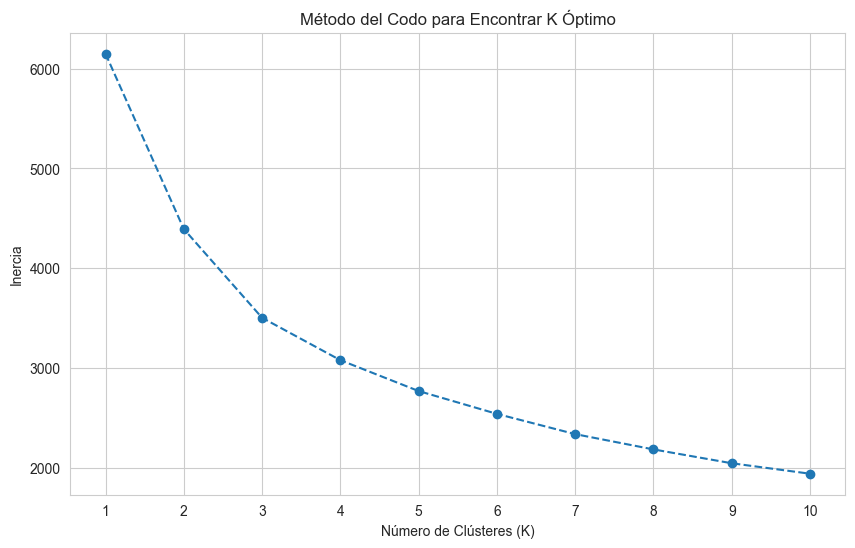

In [121]:
# Graficamos el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')

plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar K Óptimo')
plt.xticks(k_range)
plt.grid(True)

plt.show()

In [122]:
# --- 3. Entrenar el Modelo Final y Asignar Clústeres ---
# Basado en el gráfico del codo, elegimos un valor para K (ej. 4 o 5 suelen ser buenas opciones).
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

print(f"\nSe asignaron {optimal_k} clústeres a los Pokémon.")
display(df[['name', 'cluster']].head())


Se asignaron 5 clústeres a los Pokémon.


,name,cluster
0,bulbasaur,1
1,ivysaur,1
2,venusaur,0
3,charmander,1
4,charmeleon,1


In [123]:
# --- 4. Visualizar los Clústeres con PCA ---
# Reducimos las 6 dimensiones de nuestras estadísticas a solo 2 componentes principales (PCA)
# para poder graficar los clústeres en un scatter plot.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['pca1'] = df_pca[:, 0]
df['pca2'] = df_pca[:, 1]

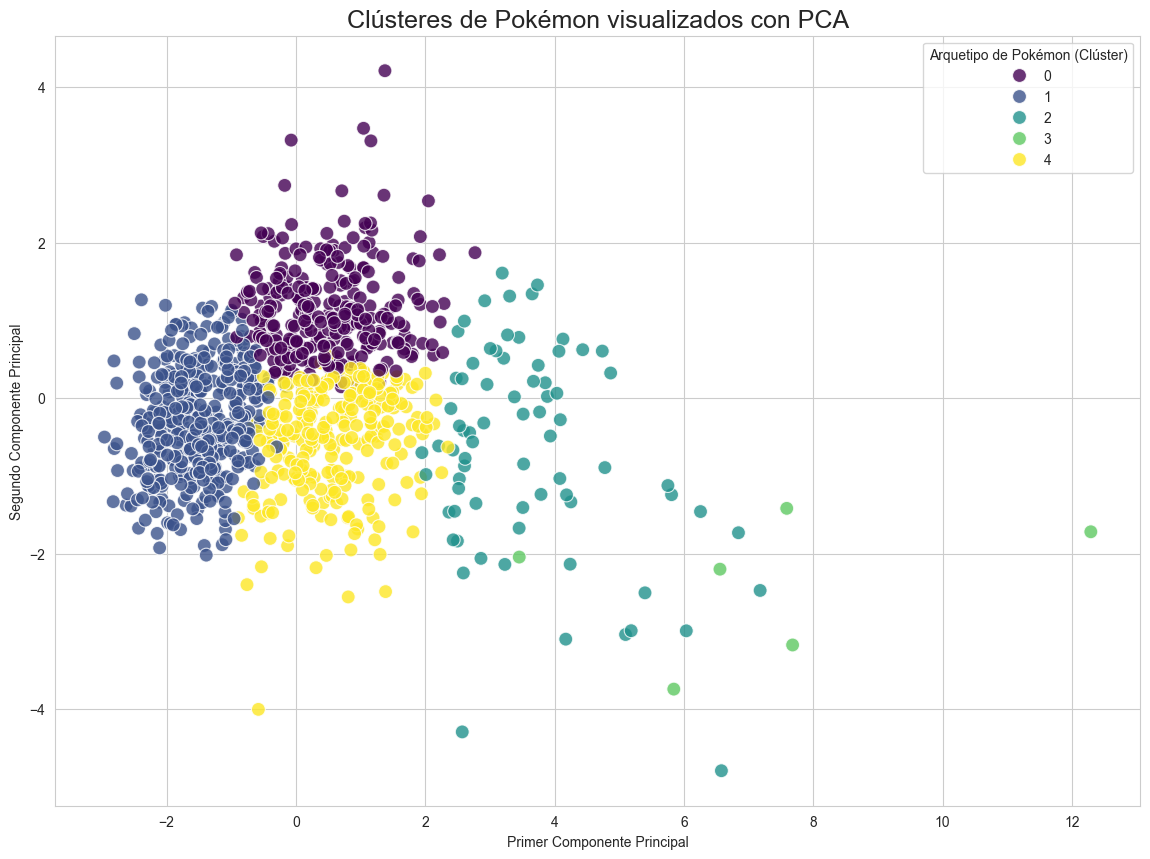

In [126]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)

plt.title('Clústeres de Pokémon visualizados con PCA', fontsize=18)
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(title='Arquetipo de Pokémon (Clúster)')

plt.show()

In [115]:
# --- 5. Versionar el Modelo de Clustering con MLflow ---
print("\nVersionando modelos de clustering con MLflow...")
with mlflow.start_run() as run:
    run_id = run.info.run_id
    mlflow.log_param("n_clusters", optimal_k)
    
    # Guardar y registrar el modelo KMeans
    joblib.dump(kmeans, "kmeans_model.joblib")
    mlflow.log_artifact("kmeans_model.joblib", artifact_path="clustering")
    
    # Guardar y registrar el scaler
    joblib.dump(scaler, "scaler.joblib")
    mlflow.log_artifact("scaler.joblib", artifact_path="clustering")
    
    print(f"Modelos de clustering guardados en MLflow Run ID: {run_id}")


Versionando modelos de clustering con MLflow...
Modelos de clustering guardados en MLflow Run ID: e6ae7c80b4454240a40b1200f1239ccb


### Analizanddo Arquetipos

In [132]:
# --- 1. Calcular las Estadísticas Promedio por Clúster ---
# Usamos groupby() sobre la columna 'cluster' que creamos y calculamos la media
# de las estadísticas originales (no las escaladas) para que sean interpretables.
cluster_analysis = df.groupby('cluster')[cluster_cols].mean()

print("--- Estadísticas Promedio por Arquetipo (Clúster) ---")
display(cluster_analysis)

--- Estadísticas Promedio por Arquetipo (Clúster) ---


,hp,attack,defense,speed,height,weight
cluster,,,,,,
0,75.686620,94.535211,72.341549,98.992958,12.992958,471.471831
1,50.542289,52.900498,50.972637,52.524876,5.865672,138.791045
2,109.635135,117.202703,108.648649,73.378378,30.175676,3775.067568
3,111.166667,84.333333,119.666667,64.333333,122.833333,5296.500000
4,82.416988,85.586873,94.694981,53.362934,13.131274,717.320463


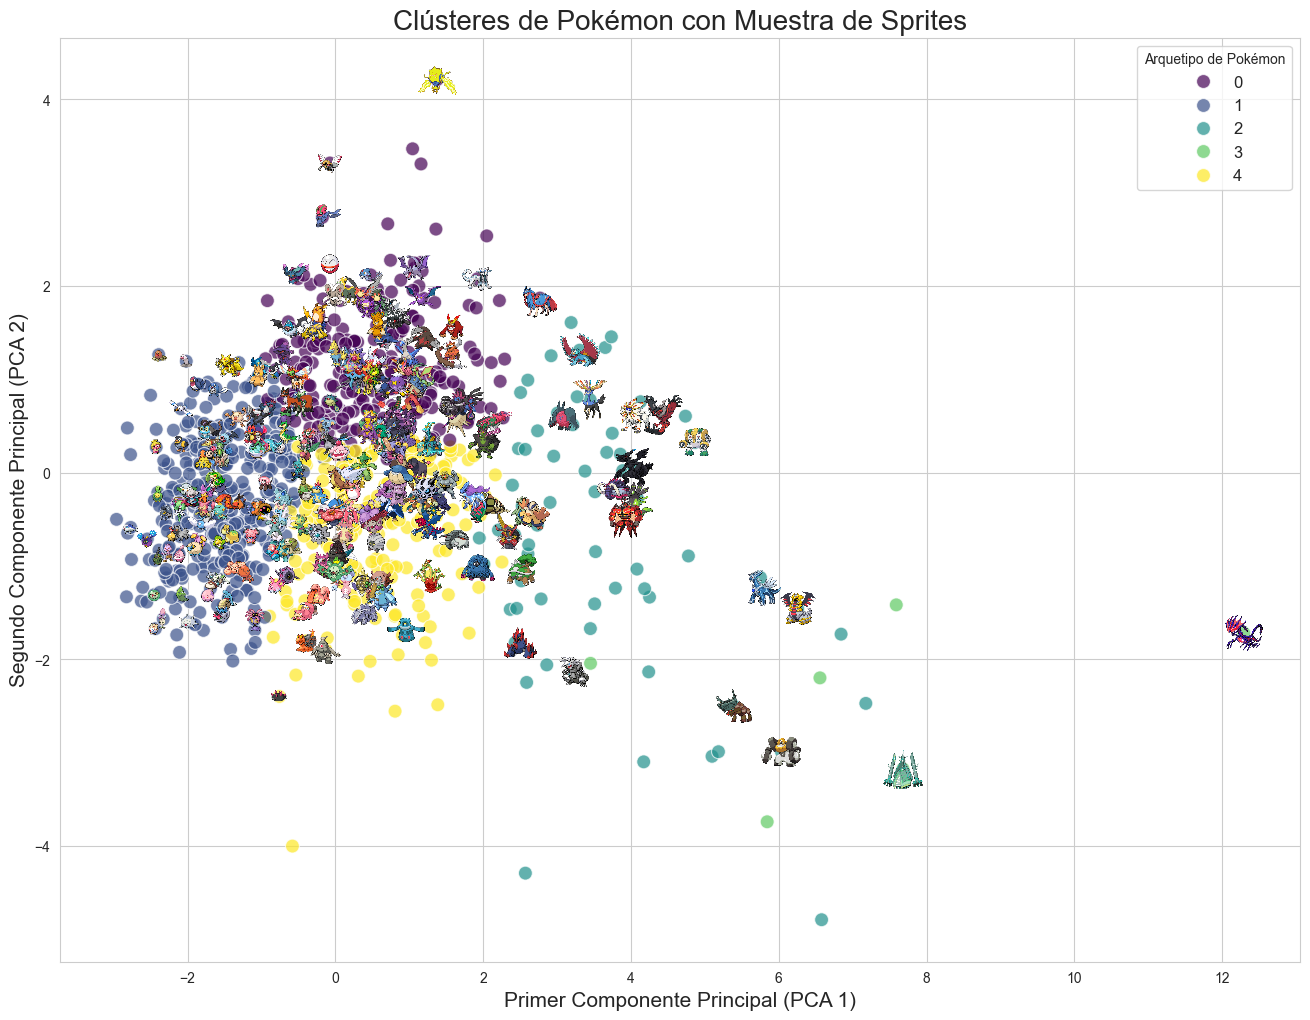

In [137]:
# --- 1. Crear el Scatter Plot Base con Colores por Clúster ---
fig, ax = plt.subplots(figsize=(16, 12))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, s=100, alpha=0.7, ax=ax, palette='viridis')

# --- 2. Superponer una Muestra de Sprites ---
# Seleccionamos una muestra aleatoria de N Pokémon para no saturar el gráfico
sample_df = df.sample(n=250, random_state=42)

for index, row in sample_df.iterrows():
    try:
        # Ruta al sprite (asumiendo que están en la carpeta 'sprites/')
        sprite_path = f"../images/sprites/{row['name'].lower()}.png"
        img = mpimg.imread(sprite_path)
        
        # El zoom debe ser pequeño para que los sprites no sean demasiado grandes
        imagebox = OffsetImage(img, zoom=0.3)
        imagebox.image.axes = ax

        # Creamos la caja de anotación en las coordenadas PCA del Pokémon
        ab = AnnotationBbox(imagebox, 
                            (row['pca1'], row['pca2']),
                            frameon=False,
                            pad=0.0) # Sin relleno alrededor de la imagen
        
        ax.add_artist(ab)
    except FileNotFoundError:
        # Ignoramos si no se encuentra un sprite para la muestra
        pass

# --- 3. Títulos y Leyendas ---
ax.set_title('Clústeres de Pokémon con Muestra de Sprites', fontsize=20)
ax.set_xlabel('Primer Componente Principal (PCA 1)', fontsize=15)
ax.set_ylabel('Segundo Componente Principal (PCA 2)', fontsize=15)
ax.legend(title='Arquetipo de Pokémon', fontsize=12)
plt.show()

--- Influencia de las Variables Originales en cada Componente PCA ---


,hp,attack,defense,speed,height,weight
PCA 1,0.436792,0.443882,0.383941,0.190071,0.460239,0.465643
PCA 2,0.039280,0.268530,-0.301755,0.855663,-0.084421,-0.309850


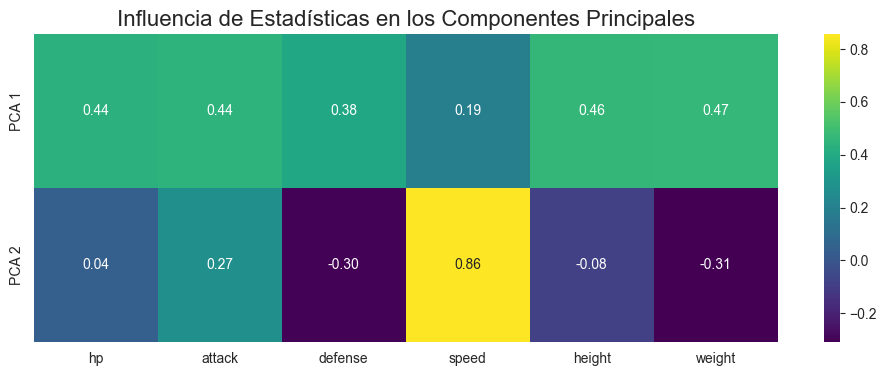

In [140]:
# Crear un DataFrame con los componentes
pca_components = pd.DataFrame(pca.components_, 
                              columns=cluster_cols, 
                              index=['PCA 1', 'PCA 2'])

print("--- Influencia de las Variables Originales en cada Componente PCA ---")
display(pca_components)


# --- Visualización con un Heatmap (Muy Recomendado) ---
# Un mapa de calor hace que sea mucho más fácil ver los patrones.
plt.figure(figsize=(12, 4))
sns.heatmap(pca_components,
            annot=True,
            cmap='viridis',
            fmt=".2f")
            
plt.title('Influencia de Estadísticas en los Componentes Principales', fontsize=16)
plt.show()